In [7]:
import matplotlib.pyplot as plt
from math import factorial

In [13]:
def num_combinations(n, k):
    return factorial(n)/(factorial(k) * factorial(n-k))

In [135]:
def num_rule(d):
    num = 0 # number of rules
    for k in range(1, d):
        num += num_combinations(d, k) * sum([num_combinations(d-k, j) for j in range(1, (d-k)+1)])
    return num

In [145]:
from itertools import combinations, permutations
from timeit import timeit
def __get_rules(cluster) -> list:
    rules = []
    for set_size in range(1, len(cluster)):
        rules.extend(list(combinations(cluster, set_size)))

    rules = list(combinations(rules, 2))

    # Prune where elements are in both antecedent and consequent
    pruned_rules = []
    for rule in rules:
        a, b = rule
        if any(p in b for p in a):
            continue
        pruned_rules.append((a,b))
        pruned_rules.append((b,a))

        
    return pruned_rules

data = [1,2,3]
res = __get_rules(data)

expected = num_rule(len(data))
actual = len(res)

print(f'Expected {expected}, got {actual}')

print('----------------')
res.sort(key=lambda x: len(x[0]) + len(x[1]))

Expected 12.0, got 12
----------------


In [142]:
n = 2
print(f'{num_rule(n):,}')

2.0


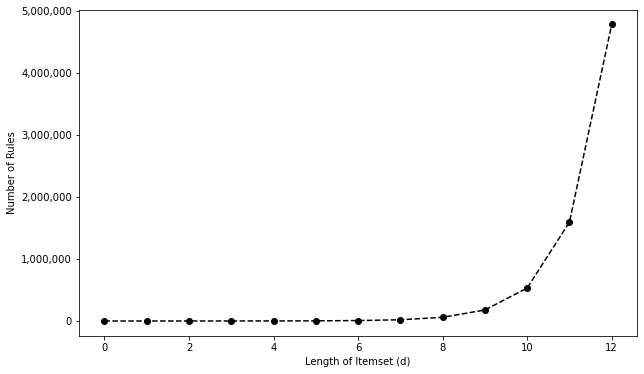

In [52]:
values = [num_rule(n) for n in range(2, 15)]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(values, '--o', color='k')
ax.set_xlabel("Length of Itemset (d)")
ax.set_ylabel("Number of Rules")
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks().tolist()])
plt.savefig('../images/numrules.png')

In [1]:
import pandas as pd

In [2]:
filepaths = [
    'data/rust_vectors_product_category.csv',
    'data/rust_vectors_product_category.pkl',
    'data/rust_vectors.csv'
    ]

In [3]:
df = pd.read_pickle(filepaths[1])

In [4]:
actual = df.shape[0]
results = []
for col in df.columns:
    filt = df[df[col] == 1]
    filt_size = filt.shape[0]
    results.append([col, filt_size/actual * 100])
results.sort(key=lambda x: x[1], reverse=True)

In [5]:
for r in results:
    print(f'{r[0].ljust(30)}: {r[1]:.2f}%')

fuel                          : 99.28%
lubricant                     : 11.46%
cigarettes                    : 8.92%
chewing gum and candy         : 7.98%
water                         : 5.09%
juices and soft drinks        : 4.81%
chocolates                    : 4.57%
cold alcoholic beverages      : 3.36%
chips                         : 2.68%
the bakery                    : 2.53%
popsicle and ice creams       : 1.82%
filters                       : 1.64%
energy                        : 1.52%
additives and fluids          : 1.44%
flavoring                     : 1.26%
biscuits and wafer            : 1.02%
derivatives peanuts           : 0.92%
several                       : 0.92%
dairy products and materials  : 0.89%
pickets                       : 0.55%
accessories                   : 0.49%
toys                          : 0.36%
cereals                       : 0.26%
salted biscuit                : 0.18%
sweet coconut james           : 0.09%
popcorn                       : 0.09%
condom    

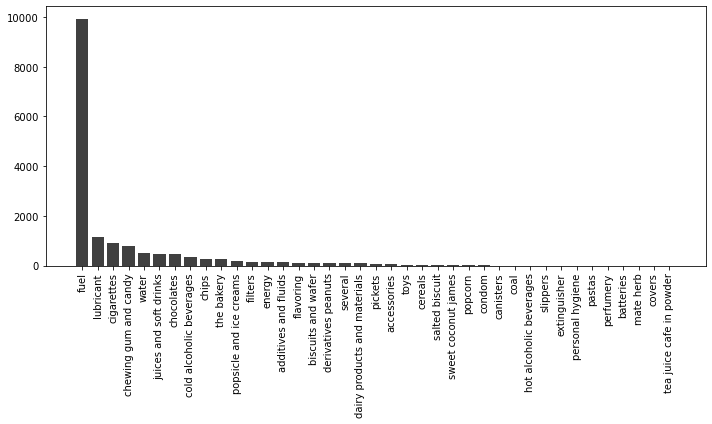

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
names = [r[0] for r in results]
vals = [r[1] * 100 for r in results]
ax.bar(names, vals, color='0.25')
ax.set_xticklabels(names, rotation=90)
plt.tight_layout()
plt.savefig('../images/category_dist.png')
plt.show()